<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Qiskit-Logo.svg" width="300"/>
    <img src="https://i.ibb.co/zs1RhvC/logo.png" width="360"/>
</p>

# <h1 align="center"> **Quantum Computation and Qiskit**</h1>
<p align="center">
Conor Ryan (ryanc70@tcd.ie),
Dominik Kuczyński (kuczynsd@tcd.ie)
</p>

In [ ]:
#Install Qiskit and relevant packages
!pip install qiskit[visualization]==1.1.0
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install graphviz
!pip install qiskit-transpiler-service
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=94a3b89aa36fd6fe339a7d1ed0355dbd4023dfcdc864faa087cda527aca64af3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## **Quantum Computing on Real Hardware**

The aim of this workshop is explore how the constraints of running quantum circuits on real quantum computers are taken into account.\
The theoretical understanding of these constraints and their inclusion in Qiskit code are developed simultaneously.\
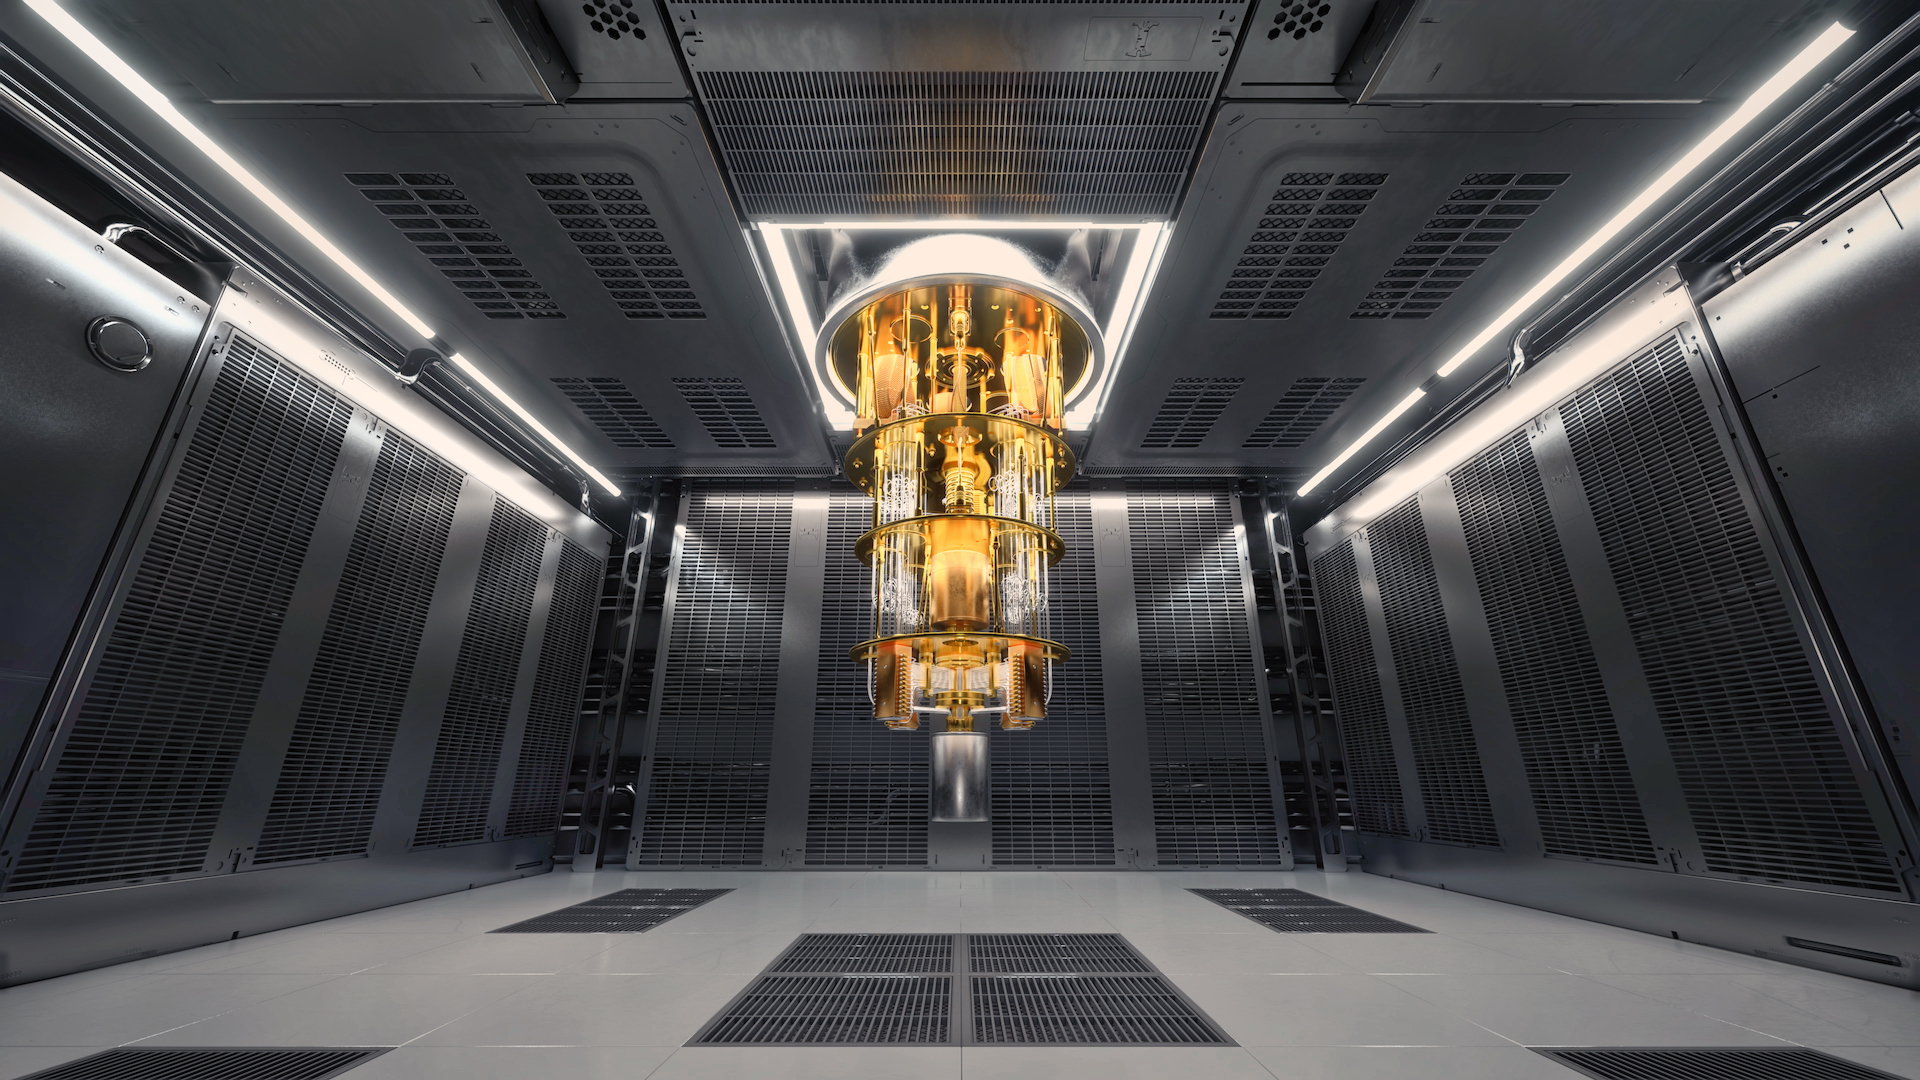

Important resource, Qiskit Documentation: https://docs.quantum.ibm.com/

Begin by creating/loading up your IBM account.\
To create your account, go to https://quantum.ibm.com/ and register with your university email.\
Once you have registered you can load your account into the notebook. You can find your API token here
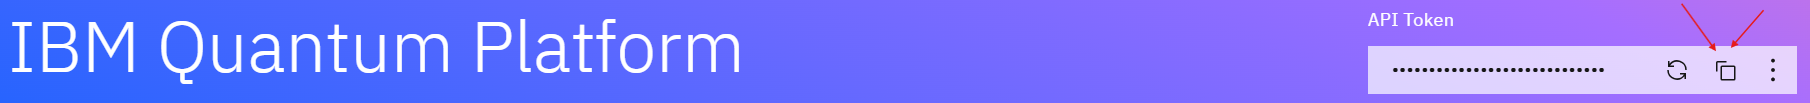

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="API Token",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

What is being done here is accessing Qiskit Runtime, an IBM Cloud Service, which provides access to many IBM quantum hardwares, simulator services, functions and error mitigation techniques. All of this is then done with a more optimised workflow between the classical and quantum components of the program.

#### **Basis Gates**

Real quantum computers cannot perform arbitrary operations. This means that any operation/gate you insert into a quantum circuit must be decomposed into the operations in the quantum computer can perform.
The set of gates that can be performed are called **basis gates**.
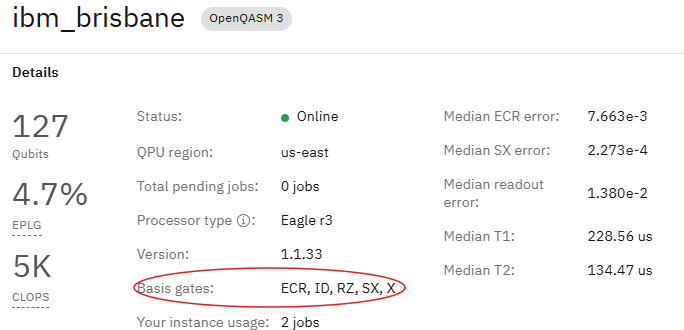


For quantum computers to be actually useful their basis gates must form a **universal gate set**.\
A gate set is said to be **universal for quantum computation** if any unitary can be approximated to arbitrary accuracy by a quantum circuit composed of those gates.\
**Theorem 1**: Two-level unitaries are universal.\
**Theorem 2**: Single-qubit and CNOT gates are universal.\
**Theorem 3**: Any single-qubit gate can be approximated within some error $\epsilon$ using $H$ and $\pi$/8-gates.

Quantum computers are considered to be more efficient than classical computers. But if we have to constantly decompose circuits over a universal set of basis gates do we lose some of that efficiency?

The best found construction for universality finds that an arbitrary $n$-qubit unitary takes $O\left(n^24^n\log_2^c{\left(n^24^n/\epsilon\right)}\right)$, which is not efficient.\
However, the quantum systems we find in nature have Hamiltonians which can be efficiently simulated.

More information on universality can be found in *Quantum Computation and Quantum Information ~ Nielsen and Chuang, Chapter 4, Section 4.5*.

Below shows how to select a particular IBM quantum processor in Qiskit using the ```.backend()``` method of Qiskit Runtime.\
To find information about the basis gates of this processor use the ```.basis_gates``` attribute.



In [ ]:
backend = service.backend("ibm_brisbane")

basis_gates = backend.basis_gates### Your code goes here
print(f"The basis gate set of the IBM brisbane quantum computer is : {basis_gates}")

The basis gate set of the IBM brisbane quantum computer is : ['ecr', 'id', 'rz', 'sx', 'x']


A list of the basis gates of the processor as strings is returned.

#### **Processor Connectivity**

In the processor of a real quantum computer only certain pairs of qubits can directly interact with each other.\
The neighbouring qubits in the system being simulated therefore need to be mapped to the neighbouring qubits of the processor.\
If random far away(on centimetre scales) qubits on the processor are selected for a simulation then they need to be moved next to each other to directly interact, or better put, their qubits states need to be moved to neighbouring qubits. This requires the use of several SWAP-gates, dramatically increasing the noise in the results.

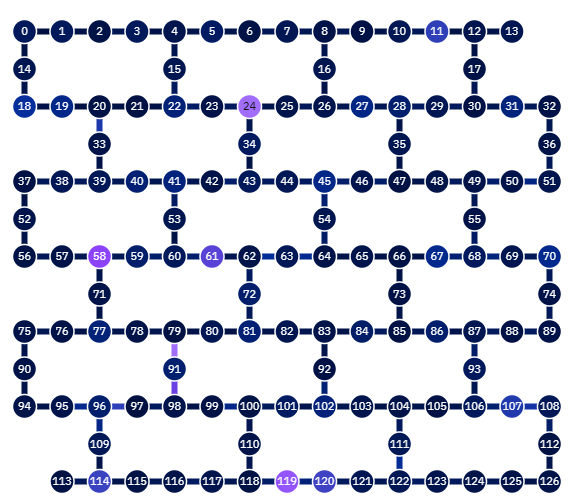

The processor connectivity is retrieved as a `CouplingMap` object using the ```.coupling_map``` attribute of the backend.

In [ ]:
coupling_map = backend.coupling_map### Your code goes here
print(f"The coupling map of the IBM brisbane quantum computer is : {coupling_map}")

The coupling map of the IBM brisbane quantum computer is : [[1, 0], [2, 1], [3, 2], [4, 3], [4, 5], [4, 15], [6, 5], [6, 7], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [12, 17], [13, 12], [14, 0], [14, 18], [15, 22], [16, 8], [16, 26], [17, 30], [18, 19], [20, 19], [20, 33], [21, 20], [21, 22], [22, 23], [24, 23], [24, 34], [25, 24], [26, 25], [27, 26], [28, 27], [28, 29], [28, 35], [30, 29], [30, 31], [31, 32], [32, 36], [33, 39], [34, 43], [35, 47], [36, 51], [37, 38], [39, 38], [40, 39], [40, 41], [41, 53], [42, 41], [42, 43], [43, 44], [44, 45], [46, 45], [46, 47], [48, 47], [48, 49], [50, 49], [50, 51], [52, 37], [52, 56], [53, 60], [54, 45], [54, 64], [55, 49], [55, 68], [56, 57], [57, 58], [58, 59], [58, 71], [59, 60], [60, 61], [62, 61], [62, 63], [62, 72], [63, 64], [65, 64], [65, 66], [67, 66], [67, 68], [69, 68], [69, 70], [73, 66], [74, 70], [74, 89], [75, 90], [76, 75], [77, 71], [77, 76], [77, 78], [79, 78], [79, 80], [80, 81], [81, 72], [81, 82], [82, 83], [83, 92], [8

See that a list is returned which gives the pairs of neighbouring qubits. The qubits can also be imagined as nodes in a graph and the pairs in the coupling map are the nodes which are connected by an edge.

The CouplingMap object can also be visualised using Qiskit code drawn from the graphviz package using the ```.draw()``` method.

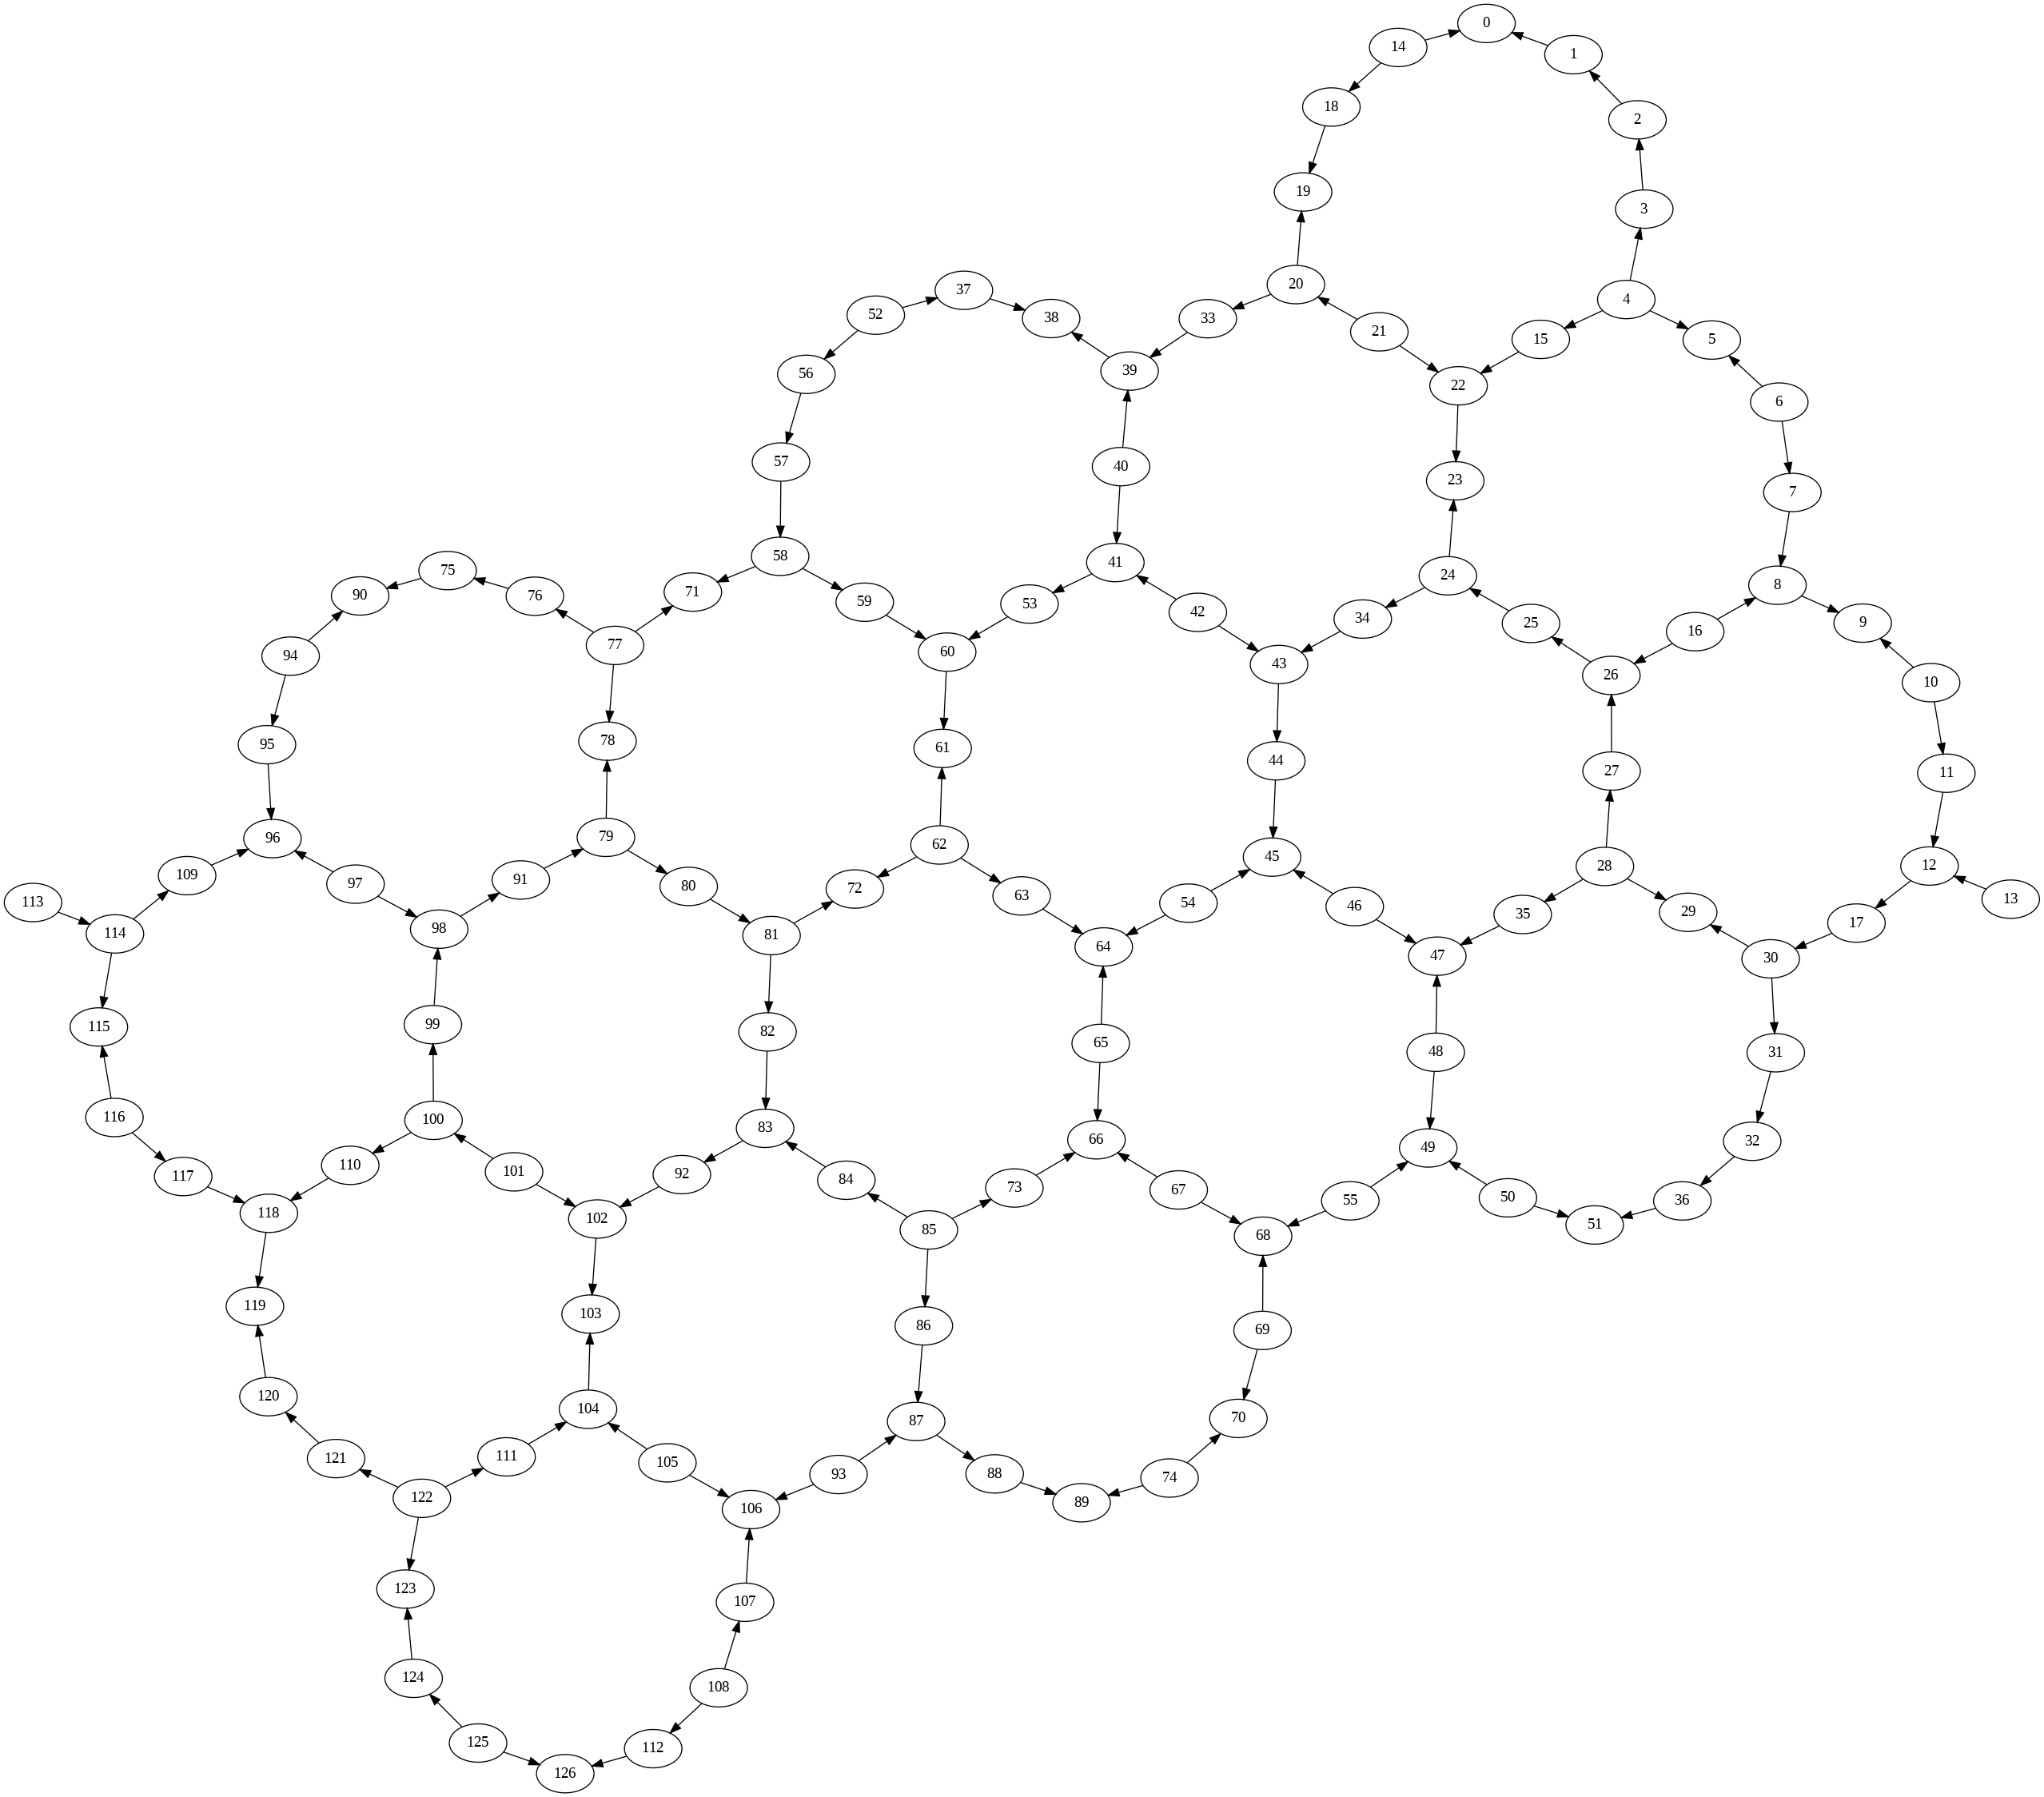

In [ ]:
coupling_map.draw()### Your code goes here

Notice that the diagram is different to the IBM Quantum Experience diagram. This because in graph theory the exact shape is not important, just which nodes have edges between them.

#### **Circuit Transpilation**

The process of converting an arbitrary quantum circuit into its hardware compatible form is known as **transpilation**.\
In Qiskit, transpilation is split into 6 stages

1.   **Initialisation**: The circuit is written in a transpilation ready form, i.e. in terms of 1 and 2-qubit gates.
2.   **Layout**: The abstract qubits of your circuit are mapped to the real physical qubits of the quantum processor.
3.   **Routing**: SWAP-gates are performed to bring all utilised physical qubits together.
4.   **Translation**: The arbitrary gates of the circuit are translated into the basis gates of the processor.
5.   **Optimisation**: The depth of the circuit is optimised to minimise errors and runtime.
6.   **Scheduling**: Delay instructions are set between pulses to align the circuit with the hardware's timing. This is usually not an important stage except for certain applications.

Generally, not all of these transpilation stages will be needed every time you want to run a quantum circuit on a real quantum computer.








The code cell below contains the code for a function which obtains certain characteristics of a quantum circuit, namely, its depth, number of qubits, number of operations and number of 2-qubit gates. These are useful metrics to give some idea of how much noise will enter into the simulation.

In [ ]:
def get_qc_characteristics(qc):
    depth = qc.depth()
    num_qubits = qc.num_qubits
    ops = qc.count_ops()
    num_multi_qubit_ops = qc.num_nonlocal_gates()
    return {"depth":depth, "num_qubits":num_qubits, "ops":ops, "num_multi_qubit_ops": num_multi_qubit_ops}

To transpile a circuit, the first thing to do is make a circuit. The example to be used will be the Quantum Fourier Transform(QFT) circuit from Qiskit's built in circuit library. The QFT forms an important part of circuits for Quantum Phase Estimation, Shor's Algorithm and Quantum Counting.

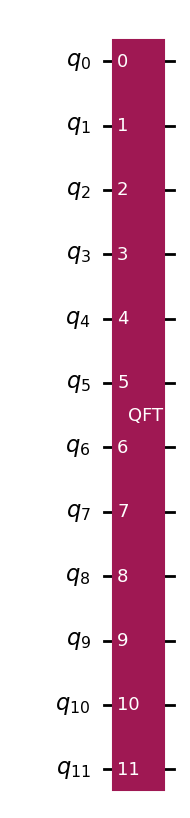

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

num_qubits = 12 # Setting the number of qubits
qft = QFT(num_qubits, do_swaps=True) # Creating the QFT circuit
qft.draw('mpl') # Drawing the QFT circuit

The Initialisation stage of transpilation can be done manually by decomposing this abstract operation into 1 and 2-qubit gates.

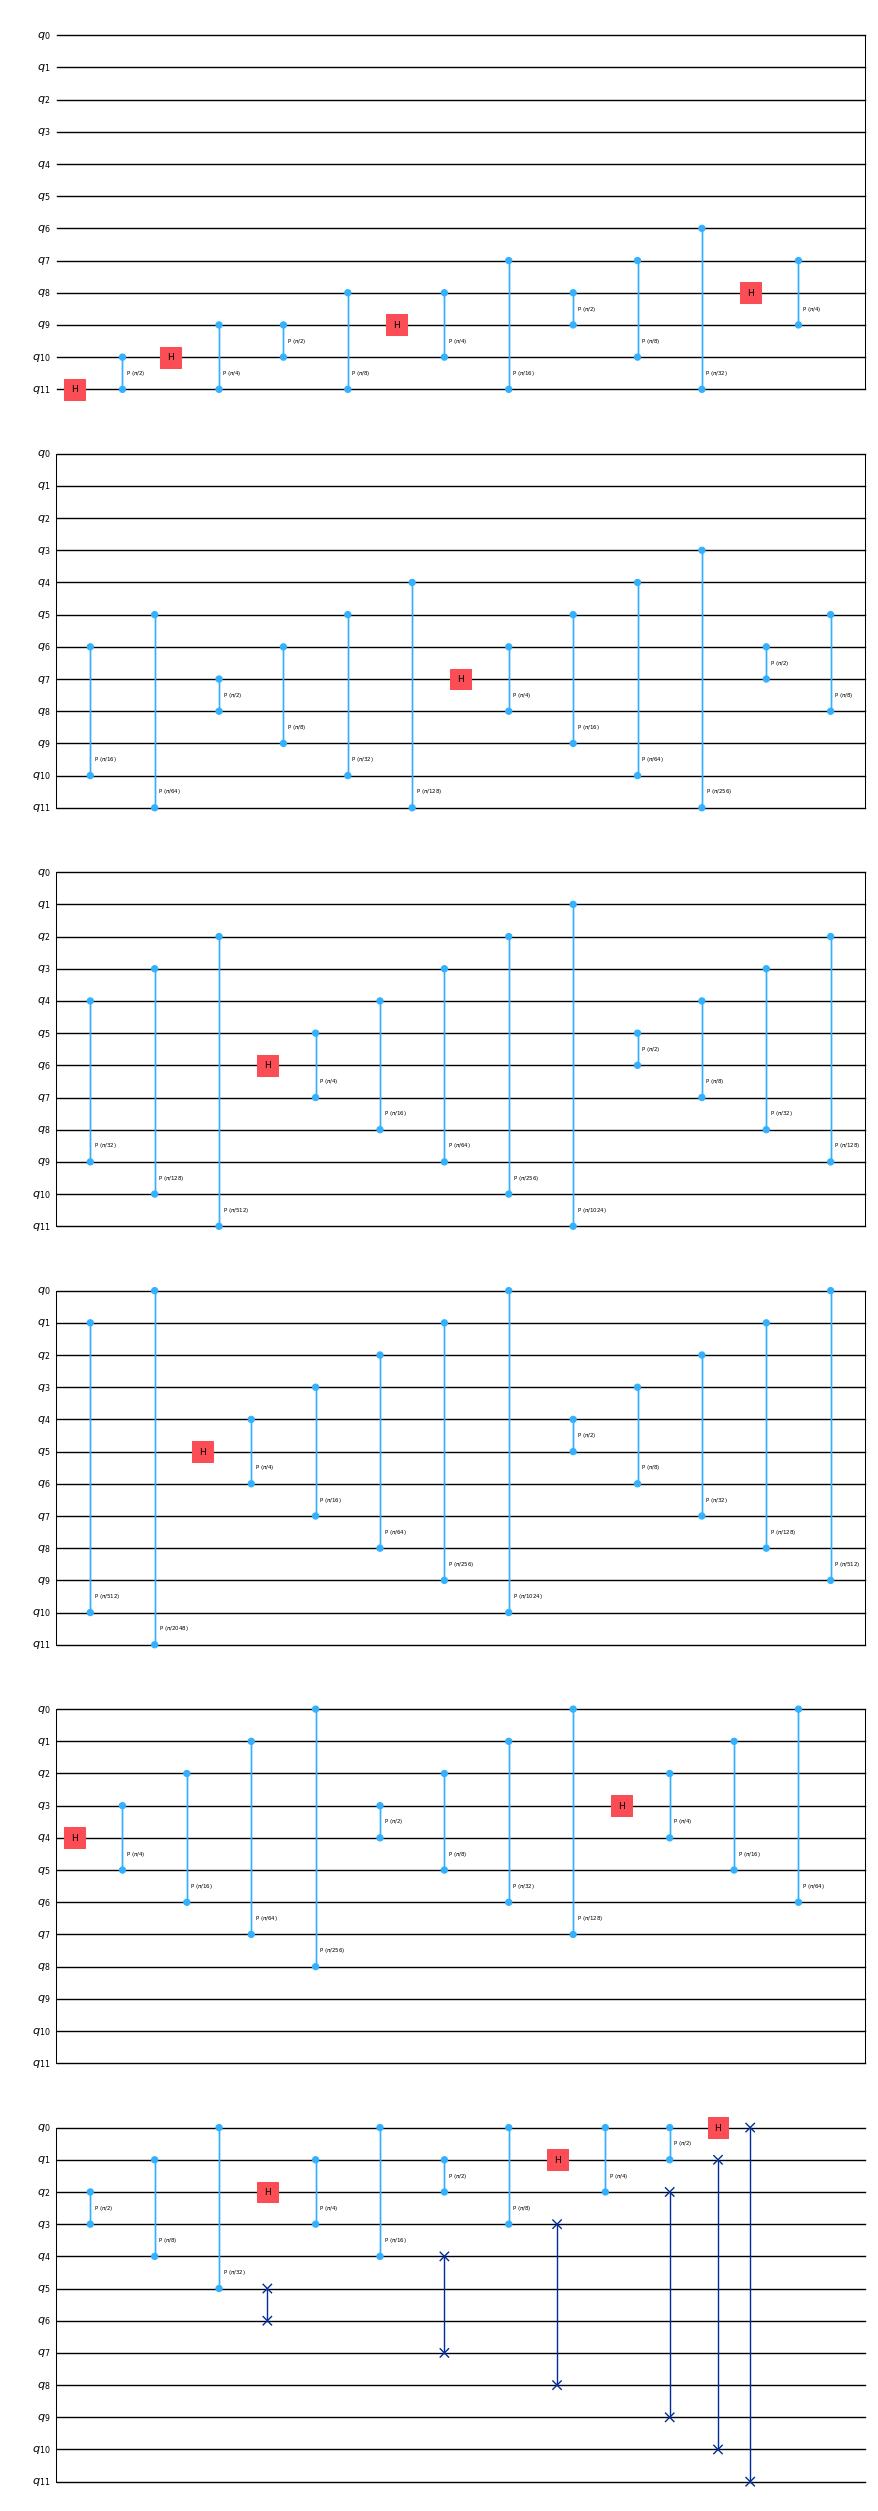

In [ ]:
qft_circuit = qft.decompose() # Decomposing the abstract QFT circuit
qft_circuit.draw('mpl', scale=0.5) # Drawing the decomposed circuit

Let's measure its characteristics to compare to its future transpiled form.

In [ ]:
# Defining a function to nicely print out the circuit characteristics
def print_qc_characteristics(qc):
    characteristics = get_qc_characteristics(qc)
    print("Quantum circuit characteristics")
    print("  Depth:", characteristics['depth'])
    print("  Number of qubits:", characteristics['num_qubits'])
    print("  Operations:", dict(characteristics['ops']))
    print("  Number of multi-qubit operations:", characteristics['num_multi_qubit_ops'])

print_qc_characteristics(qft_circuit)

Quantum circuit characteristics
  Depth: 24
  Number of qubits: 12
  Operations: {'cp': 66, 'h': 12, 'swap': 6}
  Number of multi-qubit Operations: 72


For the remaining stages of transpilation a standard way to transpile a circuit in Qiskit is using the `StagedPassManager` class. A `StagedPassManager` is a pass manager composed of several `PassManager` instances, where a `PassManager` stores a list of transpiler passes.

In [ ]:
from qiskit.transpiler import StagedPassManager, PassManager
from qiskit.transpiler.preset_passmanagers.common import generate_embed_passmanager

# Layout passes
from qiskit.transpiler.passes.layout.csp_layout import CSPLayout
from qiskit.transpiler.passes.layout.dense_layout import DenseLayout
from qiskit.transpiler.passes.layout.sabre_layout import SabreLayout
from qiskit.transpiler.passes.layout.vf2_layout import VF2Layout
from qiskit.transpiler.passes.layout.trivial_layout import TrivialLayout

# Routing passes
from qiskit.transpiler.passes.routing.basic_swap import BasicSwap
from qiskit.transpiler.passes.routing.lookahead_swap import LookaheadSwap
from qiskit.transpiler.passes.routing.sabre_swap import SabreSwap
from qiskit.transpiler.passes.routing.stochastic_swap import StochasticSwap
from qiskit.transpiler.passes.routing.star_prerouting import StarPreRouting

# Translation passes
from qiskit.circuit import SessionEquivalenceLibrary
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary
from qiskit.transpiler.passes.basis.basis_translator import BasisTranslator
from qiskit.transpiler.passes.synthesis.high_level_synthesis import HighLevelSynthesis
from qiskit.transpiler.passes.synthesis.unitary_synthesis import UnitarySynthesis

# Creating an instance of the StagedPassManager class
staged_pm = StagedPassManager()

# Initialising the layout stage with an empty instance of the PassManager class
staged_pm.layout = PassManager()
# Trivially mapping the virtual qubits of the QFT circuit to the physical qubits of the backend, i.e virtual qubit i -> physical qubit i
staged_pm.layout += TrivialLayout(coupling_map)
# Creating a PassManager object to apply the defined layout
staged_pm.layout += generate_embed_passmanager(coupling_map)

# Defining the Routing stage PassManager using the heuristic SabreSwap algorithm to SWAP around non-neighbouring qubits
staged_pm.routing = PassManager(SabreSwap(coupling_map))

# Defining the Translation stage PassManager to translate the circuit into the target basis using the gate replacement rules from the equivalence library
staged_pm.translation = PassManager([BasisTranslator(target_basis = basis_gates, equivalence_library = SessionEquivalenceLibrary)])

Before moving onto the Optimisation stage, let's analyse the transpiled circuit so far. Transpile the `qft_circuit` by using it as the arguement in the `.run()` method of the `StagedPassManager`.

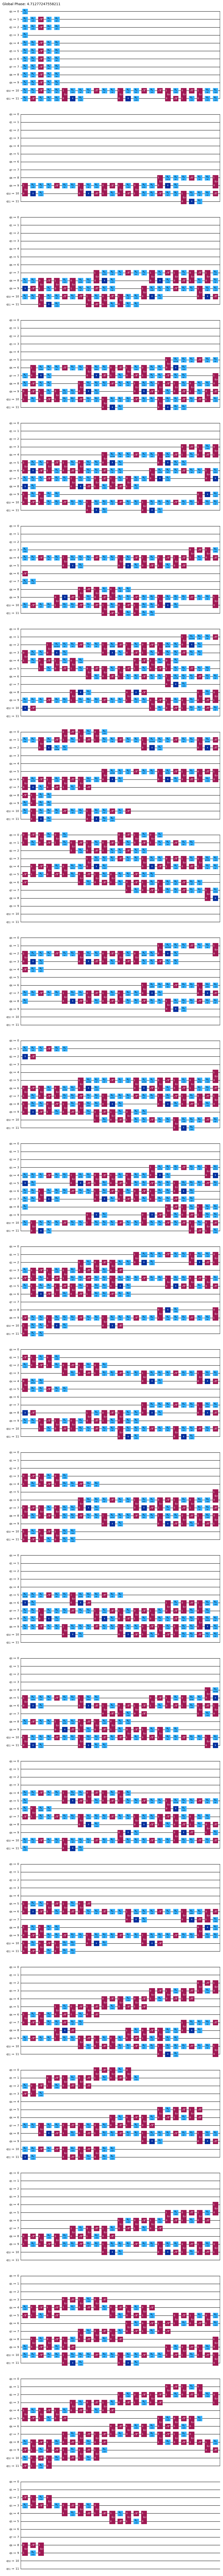

In [ ]:
transpiled_circuit = staged_pm.run(qft_circuit)### Your code goes here
transpiled_circuit.draw('mpl', idle_wires=False, scale=0.5)

In [ ]:
print_qc_characteristics(transpiled_circuit)

Quantum circuit characteristics
  Depth: 616
  Number of qubits: 127
  Operations: {'rz': 1212, 'sx': 474, 'ecr': 462, 'x': 132}
  Number of multi-qubit Operations: 462


Clearly, it would be ideal to optimise this circuit.

In [ ]:
# Optimisation passes
from qiskit.transpiler.passes.optimization.collect_1q_runs import Collect1qRuns
from qiskit.transpiler.passes.optimization.collect_2q_blocks import Collect2qBlocks
from qiskit.transpiler.passes.optimization.consolidate_blocks import ConsolidateBlocks
from qiskit.transpiler.passes.optimization.commutative_cancellation import CommutativeCancellation

staged_pm.optimization = PassManager(Collect2qBlocks()) # Gathers 2-qubit subcircuits
staged_pm.optimization += PassManager(ConsolidateBlocks()) # Replaces blocks of consecutive gates by a single unitary
staged_pm.optimization += PassManager(UnitarySynthesis(basis_gates = basis_gates, coupling_map = coupling_map)) #Translating optimised circuit back to backend compatible form

Now run the `qft_circuit` through the `StagedPassManager` as before.



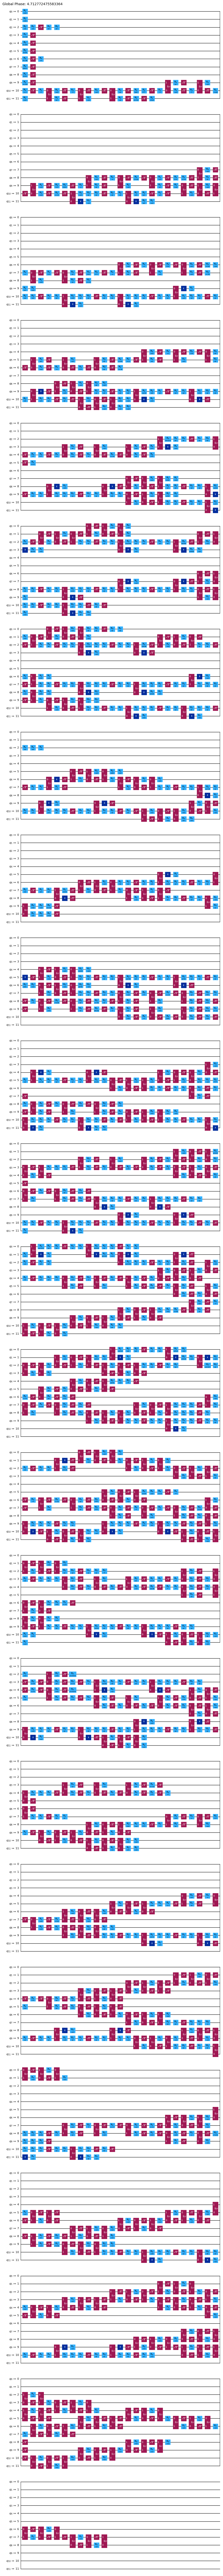

In [ ]:
transpiled_circuit_opt = staged_pm.run(qft_circuit) ### Your code goes here
transpiled_circuit_opt.draw('mpl', idle_wires=False, scale=0.5)

In [ ]:
print_qc_characteristics(transpiled_circuit_opt)

Quantum circuit characteristics
  Depth: 611
  Number of qubits: 127
  Operations: {'rz': 1123, 'sx': 580, 'ecr': 430, 'x': 76}
  Number of multi-qubit Operations: 430


Using some of the standard transpilation passes the optimised circuit has a reduced number of 2-qubit operations compared to its non-optimised form.\
Generally, there is no clear way of knowing what trade-offs are good or bad when decreasing one characteristic increases another, without running the circuit and looking at the results. However, it might be possible to reduce everything using complex transpilation passes.

While the method of using the `StagedPassManager` provides more insight into the transpiliation process and gives more user control, is it generally the best way to transpile?\
Let's compare with the IBM Cloud Qiskit Transpiler Service https://docs.quantum.ibm.com/guides/qiskit-transpiler-service and built-in Qiskit SDK transpiler functions https://docs.quantum.ibm.com/guides/defaults-and-configuration-options

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_transpiler_service.transpiler_service import TranspilerService

# Defining built-in StagedPassManagers using preset Qiskit functions and IBM's Cloud Service
pm = generate_preset_pass_manager(backend=backend, optimization_level=3) # Creating a standard built-in StagedPassManager
transpiler = TranspilerService(backend_name='ibm_brisbane', optimization_level=3, ai='false') # Creating a cloud service transpiler without AI

In the code cell below

1.   Create a loop over the given list of numbers of qubits.
2.   Create the decomposed QFT circuit for the selected number of qubits.
3.   Run the circuit through the manually defined transpiler and the two defined in the previous cell.
4.   Count the number of 2-qubit gates and the depth of the circuit using the `.num_nonlocal_gates()` and `.depth()` attributes and store the results in the given lists.


In [ ]:
num_qubits = [10, 30, 50, 70] # List of number of qubits

# Lists for the number of 2-qubit gates for each transpiler
num_gates_manual = []
num_gates_local = []
num_gates_cloud = []

# Lists for the depths of the circuit for each transpiler
depth_manual = []
depth_local = []
depth_cloud = []

### Your code goes here
for qubits in num_qubits:
    circ = QFT(qubits, do_swaps=True).decompose()
    circ_manual = staged_pm.run(circ)
    circ_local = pm.run(circ)
    circ_cloud = transpiler.run(circ)

    num_gates_manual.append(circ_manual.num_nonlocal_gates())
    num_gates_local.append(circ_local.num_nonlocal_gates())
    num_gates_cloud.append(circ_cloud.num_nonlocal_gates())

    depth_manual.append(circ_manual.depth())
    depth_local.append(circ_local.depth())
    depth_cloud.append(circ_cloud.depth())

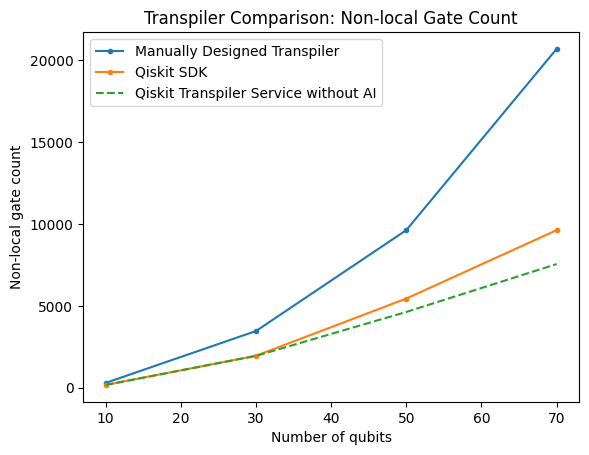

In [ ]:
import matplotlib.pyplot as plt

plt.title("Transpiler Comparison: Non-local Gate Count")
plt.plot(num_qubits, num_gates_manual, '.-')
plt.plot(num_qubits, num_gates_local, '.-')
plt.plot(num_qubits, num_gates_cloud, '--')
plt.xlabel("Number of qubits")
plt.ylabel("Non-local gate count")
plt.legend(["Manually Designed Transpiler", "Qiskit SDK", "Qiskit Transpiler Service without AI"])

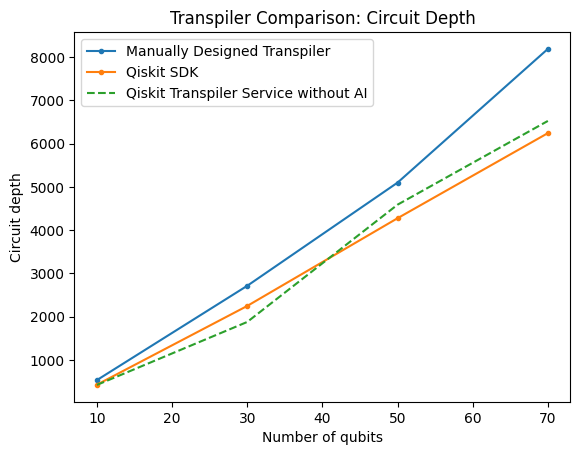

In [ ]:
plt.title("Transpiler Comparison: Circuit Depth")
plt.plot(num_qubits, depth_manual, '.-')
plt.plot(num_qubits, depth_local, '.-')
plt.plot(num_qubits, depth_cloud, '--')
plt.xlabel("Number of qubits")
plt.ylabel("Circuit depth")
plt.legend(["Manually Designed Transpiler", "Qiskit SDK", "Qiskit Transpiler Service without AI"])

#### **Error Supression and Mitigation**

Even with an effective transpilation scheme, there will still be a build up of errors in a large quantum circuit. These errors arise from the qubits interacting with each other and their wider environment, imperfect gate fidelities etc.

The error supression and mitigation techniques offered in Qiskit are

*   **Dynamical Decoupling**
*   **Pauli Twirling**
*   **Twirled Readout Error Extinction (TREX)**
*   **Zero-Noise Extrapolation (ZNE)**
*   **Probabilistic Error Amplification (PEA)**
*   **Probabilistic Error Cancellation (PEC)**



A more in-depth description of these techniques can be found here https://docs.quantum.ibm.com/guides/error-mitigation-and-suppression-techniques#dynamical-decoupling

Begin by configuring an `Estimator` primitive with no error supression and mitigation options included.

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator, EstimatorOptions

shots = 1000

options = EstimatorOptions() # Creating an instance of the EstimatorOptions class
options.optimization_level = 0
options.resilience_level = 0
options.default_shots = shots

##### **Dynamical Decoupling**

When qubits in the circuit are left without gates for a long time interactions between qubits cause coherent errors on these idling qubits. Dynamical decoupling works by inserting a pulse sequence which is equivalent to the identity, but physically has the effect of supressing the coherent errors.\
Different pulse sequences can be applied, but which pulses are best for which cases is an active area of research.\
For circuits where there are no idling qubits and all of the gates are densely packed dynamical decoupling would have minimal effect or even make performance worse.

In the cell below there is the Qiskit code to enable dynamical decoupling and use an $X-(-X)$ pulse sequence.

In [ ]:
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XpXm"

##### **Pauli Twirling**

Pauli twirling changes an arbitrary quantum channel into a Pauli channel. A Pauli channel is a convex combination of Pauli operators, or more simply put, an $n$-qubit Pauli channel corresponds to the action of random $n$-qubit Pauli strings on a quantum state $\rho$ according to some probability distribution.\
On its own, Pauli twirling best combats coherent noise. Pauli twirling is often combined with other error mitigation techniques that work better with Pauli noise than with arbitrary noise.\
Pauli twirling applies random Pauli gates on either side of a chosen set of gates such that the ideal effect of the chosen set of gates is unchanged. Instead of sampling from a single circuit, multiple circuits which would have the same ideal effect are sampled.

In the cell below Pauli twirling is enabled in Qiskit with a given number of random samples to take from the ensemble of Pauli circuits and the number of shots to run the samples for.

In [ ]:
options.twirling.enable_gates = True
options.twirling.num_randomizations = 10
options.twirling.shots_per_randomization = 100

##### **Twirled Readout Error Extinction (TREX)**

TREX mitigates against measurement errors for Pauli string observables.\
Twirled measurement are accomplished by randomly substituting a measurement gate with the gate sequence $X$-Measurmement-Classical $X$. In the absence of errors this substiution has no effect.\
In the case of readout errors, measurement twirling diagonalises the readout error transfer matrix, making it easy to invert.\
TREX is implemented in Qiskit by setting the number of randomisations and the number of shots per randomisation.

In the below cell TREX is enabled in Qiskit and the number of random substitutions to make and shots per circuit is set.

In [ ]:
options.resilience.measure_mitigation = True
options.resilience.measure_noise_learning.num_randomizations = 10
options.resilience.measure_noise_learning.shots_per_randomization = 100

##### **Zero-Noise Extrapolation (ZNE)**

ZNE is used to mitigate against errors in estimating expectation values of observables.\
ZNE operates by firstly by executing the desired circuit multiple times at different noise rates. Once the result as a function of the noise rate is found it is extrapolated back to the zero-noise limit.\
In Qiskit, ZNE is performed by means of digital-gate folding, where the noise rate of 2-qubit gates is amplified by applying sequences of the gate and its inverse after the original gate, i.e $U$⟶$UU^{\dagger}U$ results in an increase in the noise rate by a factor of 3.\
A trial function (e.g linear, exponential) can then be given to use during extrapolation.

The following cell enables ZNE in Qiskit along with defining the noise factors to amplify to and the trial function.

In [ ]:
options.resilience.zne_mitigation = True
options.resilience.zne.noise_factors = (1, 3, 5, 7)
options.resilience.zne.extrapolator = ("linear", "polynomial_degree_3")

##### **Probabilistic Error Amplification (PEA)**

In ZNE the noise amplification may be done inaccurately using the gate folding technique. PEA performs preliminary experiments to accurately reconstruct the noise before amplifying it. In utility scale experiments it is often the best choice.

The cell below modifies the ZNE method from gate-folding to PEA.

In [ ]:
options.resilience.zne.amplifier = "pea"

##### **Probabilistic Error Cancellation (PEC)**

PEC is used to mitigate against errors in expectation values of observables.\
PEC decomposes the effect of the ideal target quantum circuit as the effect of a linear combinations of noisy quantum circuits, $\mathcal{O}_\text{ideal}=\sum_i\eta_i\mathcal{O}_{\text{noisy},i}$.\
Noisy circuits from the linear combinations are then chosen and run according to their "probabilities" $\eta_i$ until the expectation value reaches its desired accuracy or a set number of samples are taken.\
The sampling and running of a collection of noisy circuits results in a larger computational overhead.

The next cell makes sure PEC is not enabled, since it cannot be enabled at the same time as ZNE. Setting the limit of the sampling overhead is commented out.

In [ ]:
options.resilience.pec_mitigation = False
#options.resilience.pec.max_overhead = 50

## **Execution of a Utility Scale Algorithm on a Real Quantum Computer**

Now that all of the considerations of running quantum circuits on a real quantum device have been explored, it is time to bring everything together and test the transpilation and error mitigation techniques on a utility scale style algorithm.

The example problem given in this notebook is the use of the Variational Quantum Eigensolver (VQE) algorithm to find the ground state energy of a spin chain.

VQE is a hybrid quantum-classical algorithm inspired by the Variational Principle in quantum mechanics.
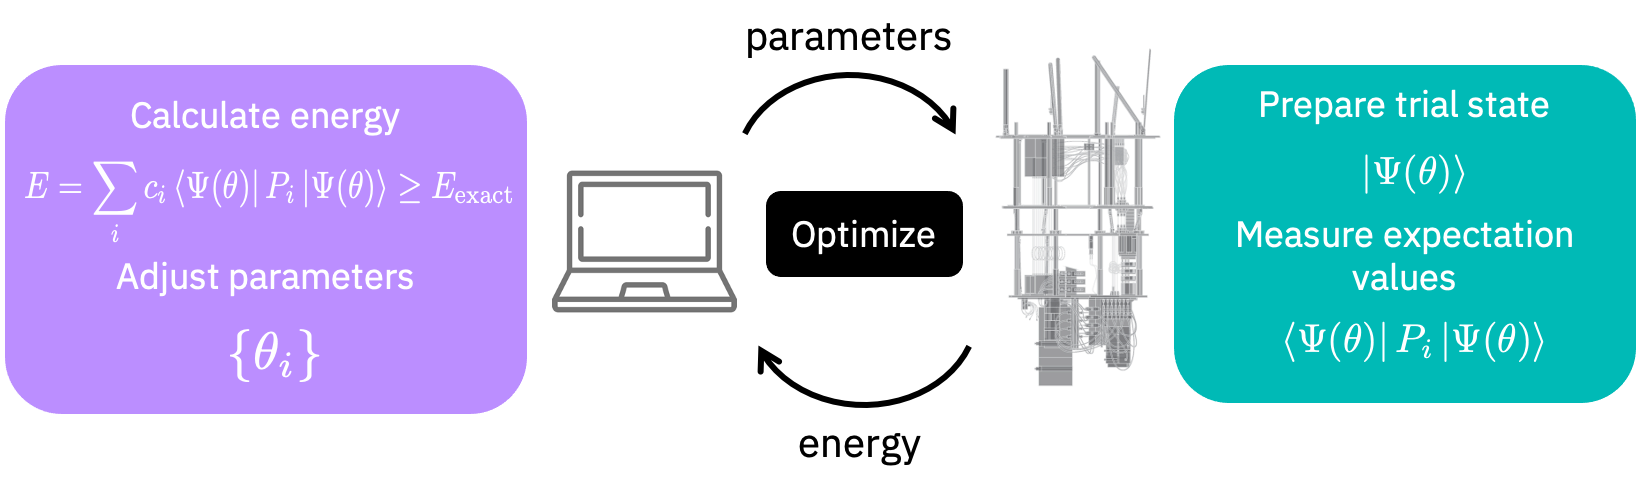\
The Variational Principle states $\langle\psi(\vec{\theta})|H|\psi(\vec{\theta})\rangle\geq E_0$.\
$|\psi(\vec{\theta})\rangle$ is a trial wavefunction dependent on a set of parameters contained in the vector $\vec{\theta}$.\
By tuning the $\vec{\theta})$ parameters the inequality can become an equality, at least to some acceptable accuracy.\
What VQE does is
1. Prepare the trial wavefunction using a parameterised quantum circuit, initially with a random set of parameters.
2. Calculate $\langle H\rangle_\theta$.
3. The cost function, which in this case is the energy, is then minimised on a classical computer using a defined optimiser.
4. A new set of paramters is then given to the quantum computer to create a new trial quantum state to calculate the energy of.
5. The process is repeated for a set number of iterations after which a final result for the energy is given.

For this particular problem, the quantum system under investigation is the Heisenberg spin chain in a transverse magnetic field. The general Hamiltonian for the Heisenberg model in a transverse magnetic field with closed boundary conditions is
\begin{equation}\notag
  H = \sum_{i=1}^{N-1}J_x\sigma_i^x\sigma_{i+1}^x+J_y\sigma_i^y\sigma_{i+1}^y+J_z\sigma_i^z\sigma_{i+1}^z+\sum_{i=1}^NB\sigma_i^x
\end{equation}
$J_x$, $J_y$, $J_z$ are the couplings strengths between the spin directions, $B$ is the magnetic field strength, $N$ is the number of spins(qubits) and $i$ is the spin site index.\
To better understand what this Hamiltonian means for specific $N$, consider the $N=2$ example
\begin{align}
  H &= J_x\sigma_1^x\sigma_2^x + J_y\sigma_1^y\sigma_2^y + J_z\sigma_1^z\sigma_2^z + B\sigma_1^x + B\sigma_2^x\\
  &= J_x\left(\sigma^x\otimes\sigma^x\right)+J_y\left(\sigma^y\otimes\sigma^y\right)+J_z\left(\sigma^z\otimes\sigma^z\right)+B\left(\sigma^x\otimes\mathbf{1}\right)+B\left(\mathbf{1}\otimes\sigma^x\right)
\end{align}
The Heisenberg model, introduced by Werner Heisenberg, is a popular model used to study magnetic phenomena and phase transitions in many-body systems. It examines the dynamics which emerge from what is called the exchange interaction, which arises as a result of the Pauli Exchange Principle and Coulomb interaction.

In this notebook, the Hamiltonian parameters are chosen such that $J_x=J_y=1$, and $J_z$ is chosen arbitrarily. In this case $J_z$ is called the **anisotropy**.
*   $J_z=1$ is the **isotropic** phase, also called the $XXX$ Heisenberg model.
*   $J_z\neq1$ is the **anisotropic** phase.



Below is the Qiskit code to create a function which builds the Heisenberg Hamiltonian with closed boundary conditions in a transverse magnetic field.

In [ ]:
from qiskit.transpiler import CouplingMap
from qiskit.quantum_info import SparsePauliOp

def build_Hamiltonian(num_spins, anisotropy, B):

    ### Your code goes here ###
    lattice_map = CouplingMap.from_line(num_spins, bidirectional=False) # Creating the coupling map for the spin chain

    edgelist = lattice_map.graph.edge_list() # Obtaining the list of edges(interacting spin pairs)
    Hamlist = [] # Defining a list to store all of the Hamiltonian terms in

    for edge in edgelist: # Looping over the graph edges
        # Adding all of the Hamiltonian terms to the list
        Hamlist.append(("XX", edge, 1.))
        Hamlist.append(("YY", edge, 1.))
        Hamlist.append(("ZZ", edge, anisotropy))

    for qubit in lattice_map.physical_qubits: # Looping over all of the spins(qubits)
        Hamlist.append(("X", [qubit], B)) # Adding all of the magnetic field terms to the list

    Hamiltonian = SparsePauliOp.from_sparse_list(Hamlist, num_qubits=num_spins) # Building the Hamiltonian operator from the list of terms
    return Hamiltonian

In [ ]:
num_spins = 12
anisotropy = 0.5
B = 2.

H = build_Hamiltonian(num_spins, anisotropy, B)
print(H)

SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ', 'IIIIIIIIIXXI', 'IIIIIIIIIYYI', 'IIIIIIIIIZZI', 'IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII', 'IIIIIIIXXIII', 'IIIIIIIYYIII', 'IIIIIIIZZIII', 'IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII', 'IIIIIXXIIIII', 'IIIIIYYIIIII', 'IIIIIZZIIIII', 'IIIIXXIIIIII', 'IIIIYYIIIIII', 'IIIIZZIIIIII', 'IIIXXIIIIIII', 'IIIYYIIIIIII', 'IIIZZIIIIIII', 'IIXXIIIIIIII', 'IIYYIIIIIIII', 'IIZZIIIIIIII', 'IXXIIIIIIIII', 'IYYIIIIIIIII', 'IZZIIIIIIIII', 'XXIIIIIIIIII', 'YYIIIIIIIIII', 'ZZIIIIIIIIII', 'IIIIIIIIIIIX', 'IIIIIIIIIIXI', 'IIIIIIIIIXII', 'IIIIIIIIXIII', 'IIIIIIIXIIII', 'IIIIIIXIIIII', 'IIIIIXIIIIII', 'IIIIXIIIIIII', 'IIIXIIIIIIII', 'IIXIIIIIIIII', 'IXIIIIIIIIII', 'XIIIIIIIIIII'],
              coeffs=[1. +0.j, 1. +0.j, 0.5+0.j, 1. +0.j, 1. +0.j, 0.5+0.j, 1. +0.j, 1. +0.j,
 0.5+0.j, 1. +0.j, 1. +0.j, 0.5+0.j, 1. +0.j, 1. +0.j, 0.5+0.j, 1. +0.j,
 1. +0.j, 0.5+0.j, 1. +0.j, 1. +0.j, 0.5+0.j, 1. +0.j, 1. +0.j, 0.5+0.j,
 1. +0.j, 1. +0.j, 0.5+0

Now that the Hamiltonian has been made, the ansatz(guess) state $|\psi(\theta)\rangle$ has to be made. The ansatz will be built using circuits from the built-in Qiskit circuit library.\
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.TwoLocal
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.EfficientSU2


The number of parameters to optimise is 48


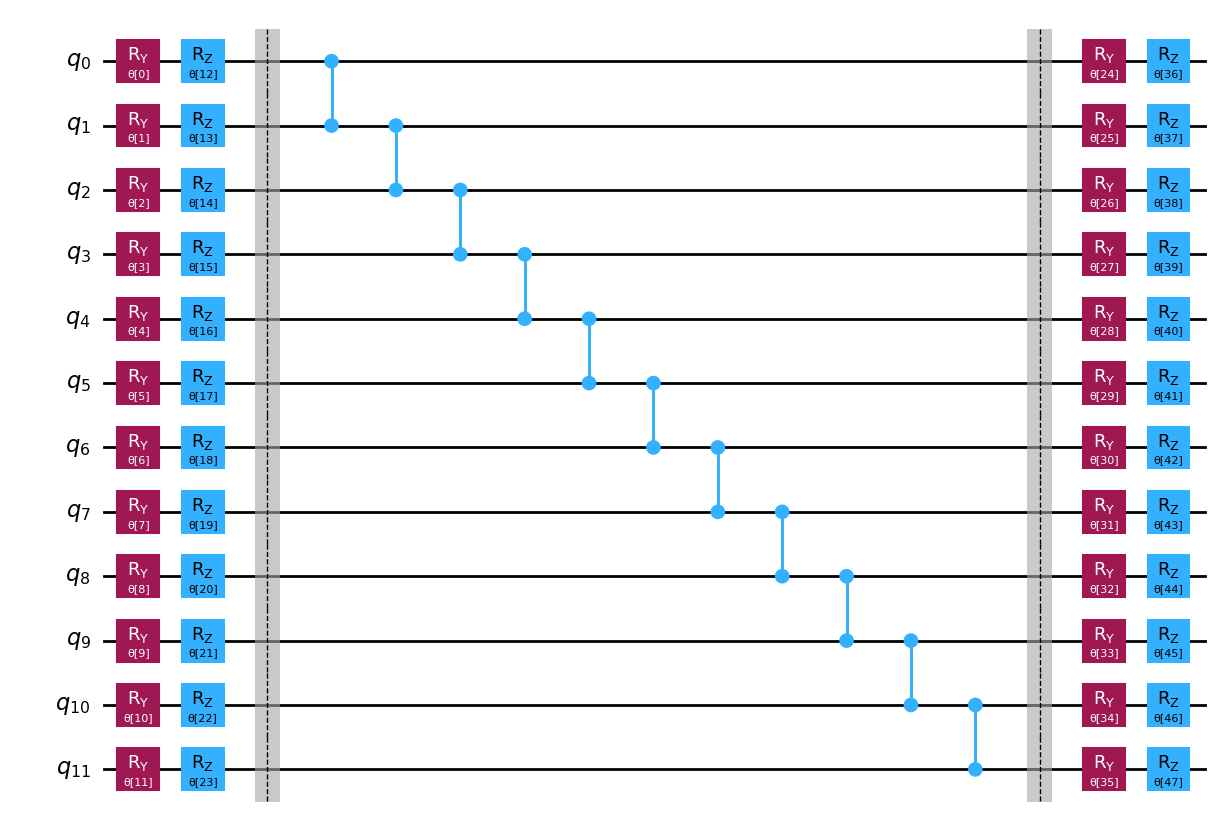

In [ ]:
from qiskit.circuit.library import EfficientSU2, TwoLocal # Importing ansatz circuit options

rotation_blocks = ['ry','rz']
entanglement_blocks = 'cz'
entanglement = 'linear'

ansatz = TwoLocal(num_spins, rotation_blocks,entanglement_blocks, entanglement, reps=1, insert_barriers=True)

print(f"The number of parameters to optimise is {ansatz.num_parameters}")
ansatz.decompose().draw('mpl')

Now that the Hamiltonian and ansatz have been defined the next step is define the cost function to be optimised, which will just be a function to calculate the energy.

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator):

    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

To prepare an initial ansatz for the beginning of the VQE algorithm an initial set of parameters need to be generated.

In [43]:
import numpy as np

params_in = 2 * np.pi * np.random.random(ansatz.num_parameters)

Now that all of the initial preparation to run VQE on the spin chain is done, the cell below contains the Qiskit code to run the simulation on a classically prepared local backend so there is no need to queue for the real device.\
The cost function is set to optimise using COBYLA, a SciPy optimiser. The option to set the maximum number of evaluations of the cost function is also included.

In [44]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_ibm_runtime import Session
from scipy.optimize import minimize

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

#backend_vqe = FakeBrisbane()
backend_vqe = AerSimulator()

with Session(backend=backend_vqe) as session:
    estimator_vqe = Estimator(mode=session)
    estimator_vqe.options.default_shots = 1000

    transpiled_ansatz = transpile(ansatz, backend_vqe)

    result = minimize(
        cost_func,
        params_in,
        args=(transpiled_ansatz, H, estimator_vqe),
        method="cobyla",
        #options={'maxiter':100}
    )
    session.close()

Iters. done: 1 [Current cost: -3.0734265734265733]
Iters. done: 2 [Current cost: -2.9395604395604393]
Iters. done: 3 [Current cost: -2.844655344655344]
Iters. done: 4 [Current cost: -1.7307692307692304]
Iters. done: 5 [Current cost: -2.873626373626373]
Iters. done: 6 [Current cost: -2.71978021978022]
Iters. done: 7 [Current cost: -5.106393606393607]
Iters. done: 8 [Current cost: -3.5799200799200794]
Iters. done: 9 [Current cost: -5.6348651348651355]
Iters. done: 10 [Current cost: -3.9345654345654353]
Iters. done: 11 [Current cost: -6.418081918081917]
Iters. done: 12 [Current cost: -5.323176823176822]
Iters. done: 13 [Current cost: -7.297202797202798]
Iters. done: 14 [Current cost: -7.941558441558442]
Iters. done: 15 [Current cost: -6.552947052947054]
Iters. done: 16 [Current cost: -7.591908091908092]
Iters. done: 17 [Current cost: -7.756743256743258]
Iters. done: 18 [Current cost: -8.541958041958043]
Iters. done: 19 [Current cost: -8.192307692307692]
Iters. done: 20 [Current cost: -7.5

We can now check the final output of the results.

In [45]:
result

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -14.166333666333669
       x: [ 5.208e+00  5.630e+00 ...  4.926e+00  3.207e+00]
    nfev: 429
   maxcv: 0.0

It also proves insightful to look at how the energy result converged over the iterations of the algorithm.

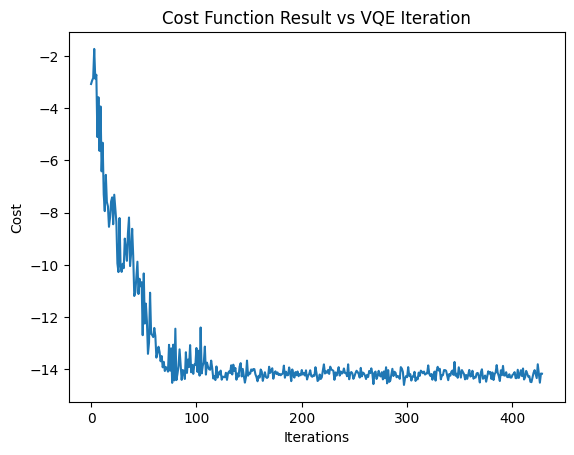

In [48]:
fig, ax = plt.subplots()
ax.set_title("Cost Function Result vs VQE Iteration")
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

The next problem is to replicate this VQE simulation, but for a system with periodic boundary conditions, $\sigma_{N+1}^\alpha=\sigma_1^\alpha$.\
While replicating the simulation include the transpilation and error mitigation techniques from earlier.